In [1]:
import pandas as pd
import numpy as np
from pydub import AudioSegment
import os

In [3]:
path_metal = "C:/Users/Артём/Desktop/Diplom/sound/metal"
full_sound = AudioSegment.empty()
for filename in os.listdir(path_metal):
    if filename.endswith(".mp3"):
        track = AudioSegment.from_file(os.path.join(path_metal, filename))
        full_sound+= track
full_sound.export("C:/Users/Артём/Desktop/Diplom/sound/metal/full_sound.wav", format = "wav")

<_io.BufferedRandom name='C:/Users/Артём/Desktop/Diplom/sound/metal/full_sound.wav'>

In [4]:
sound = AudioSegment.from_wav("C:/Users/Артём/Desktop/Diplom/sound/metal/full_sound.wav")

In [25]:
time_met = sound.duration_seconds
time_met = int(time_met)
time_met*=1000
time_met

268000

In [27]:
for time in range(0,time_met,5000):
    new_sound = sound[time:5000+time]
    new_sound.export(f"C:/Users/Артём/Desktop/Diplom/sound/metal/metal_{time//5000}.wav", format="wav")

In [11]:
import scipy.io.wavfile as scwav

In [12]:
chastota, array_sound = scwav.read("C:/Users/Артём/Desktop/Diplom/sound/metal/metal_1.wav")

In [17]:
print(f"Массив звуковой дорожки: {array_sound[:10]}")
print(f"Частота: {chastota}")
print(f"Количество каналов: {array_sound.shape[1]}")

Массив звуковой дорожки: [[  430    60]
 [ 2328  2493]
 [ 2781  1250]
 [ 1639 -2106]
 [ -274 -1490]
 [ -563   710]
 [  776   971]
 [  964   358]
 [ -193  -369]
 [ -284  -753]]
Частота: 22050
Количество каналов: 2


In [18]:
print(type(array_sound[3]))
a = array_sound.dtype
b = str(a)
c = b[3]+b[4]
d = int(c)
d

<class 'numpy.ndarray'>


16

In [20]:
#Нормализовать значения 
norm_array = array_sound[:]/32767
norm_array[:10]

array([[ 0.01312296,  0.00183111],
       [ 0.07104709,  0.07608264],
       [ 0.08487197,  0.03814814],
       [ 0.05001984, -0.06427198],
       [-0.00836207, -0.04547258],
       [-0.01718192,  0.02166814],
       [ 0.02368236,  0.02963347],
       [ 0.02941984,  0.01092563],
       [-0.00589007, -0.01126133],
       [-0.00866726, -0.02298044]])

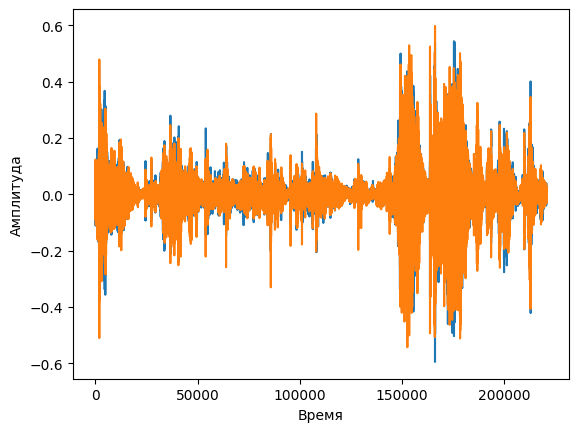

In [21]:
import matplotlib.pyplot as plt
plt.plot(norm_array)
plt.xlabel('Время')
plt.ylabel('Амплитуда')
plt.show()

In [31]:
mean_array = norm_array.mean(axis=1)
mean_array[:10]

array([ 0.00747703,  0.07356487,  0.06151006, -0.00712607, -0.02691733,
        0.00224311,  0.02665792,  0.02017273, -0.0085757 , -0.01582385])

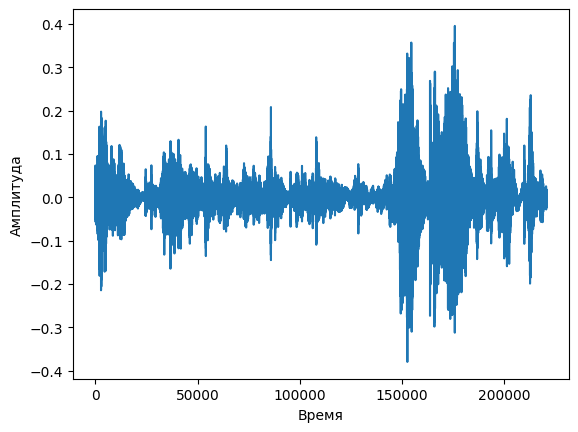

In [30]:
import matplotlib.pyplot as plt
plt.plot(mean_array)
plt.xlabel('Время')
plt.ylabel('Амплитуда')
plt.show()

In [32]:
from scipy.signal import spectrogram

In [52]:
array_time, times, Sxx= spectrogram(mean_array, chastota)

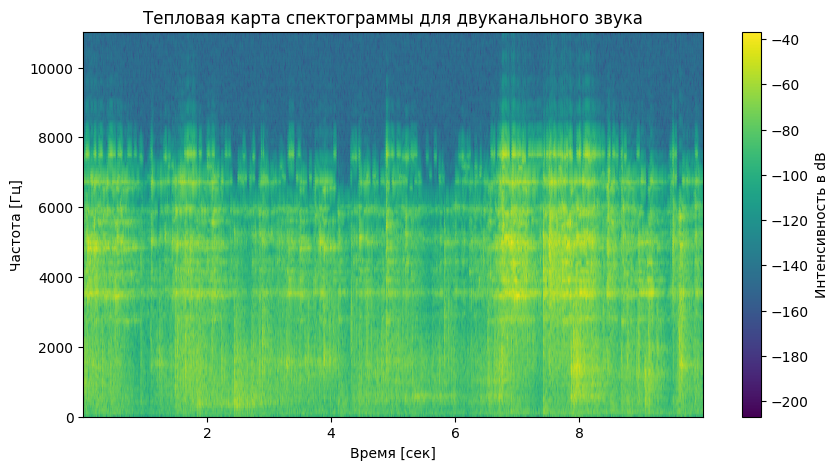

In [54]:
plt.figure(figsize=(10, 5))
plt.pcolormesh(times, array_time, 10 * np.log10(Sxx), shading='gouraud')
plt.ylabel('Частота [Гц]')
plt.xlabel('Время [сек]')
plt.title('Тепловая карта спектограммы для двуканального звука')
plt.colorbar(label='Интенсивность в dB')
plt.show()

In [112]:
noise = np.random.normal(0, 1, norm_array.shape)
noise

array([[-1.45589005, -0.19132968],
       [ 0.5044352 , -0.04607646],
       [-1.11414244,  1.60175737],
       ...,
       [-1.74995865, -0.818366  ],
       [ 1.05349394, -0.09473995],
       [-0.80294213,  0.6279713 ]])

In [ ]:
norm_noise = noise * 0.005
noisy_array = norm_array + norm_noise

noisy_data = np.clip(noisy_array, -1, 1)
noisy_data = noisy_data.mean(axis=1)
scwav.write('C:/Users/Артём/Desktop/Diplom/sound/metal/noise_met.wav', chastota, noisy_data.astype(np.float32))

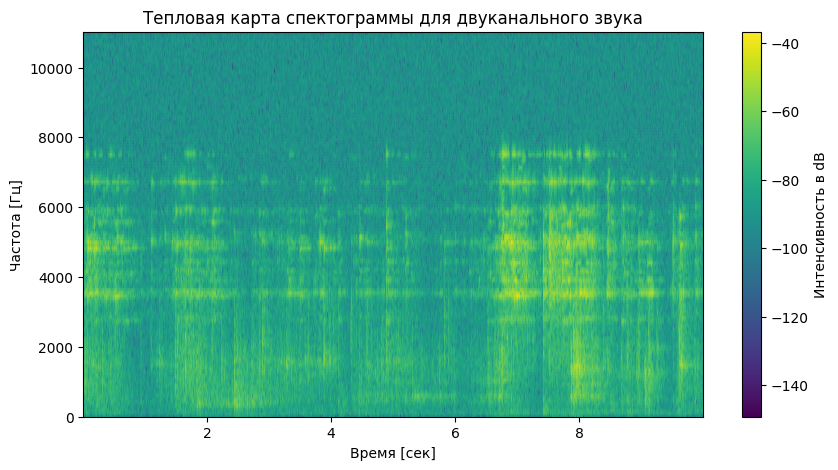

In [120]:
array_time_noise, times_noise, Sxx_noise= spectrogram(noisy_data, chastota)
plt.figure(figsize=(10, 5))
plt.pcolormesh(times_noise, array_time_noise, 10 * np.log10(Sxx_noise), shading='gouraud')
plt.ylabel('Частота [Гц]')
plt.xlabel('Время [сек]')
plt.title('Тепловая карта спектограммы для двуканального звука')
plt.colorbar(label='Интенсивность в dB')

In [1]:
import numpy as np
import scipy.io.wavfile as scwav
from scipy.signal import spectrogram
import os
import pandas as pd
from pydub import AudioSegment
import matplotlib.pyplot as plt

In [2]:
path_audio_met = "C:/Users/Артём/Desktop/Diplom/sound/metal"
path_audio_wood = "C:/Users/Артём/Desktop/Diplom/sound/wood"

In [3]:
path = path_audio_wood
output_name = "output_file_wood"

In [4]:
def convert_wav(path, output_name):
    full_sound = AudioSegment.empty()
    if not os.path.isdir(output_name):
        os.mkdir(output_name)
        #dir = os.getcwd()
        path_output = os.chdir(output_name)
    for filename in os.listdir(path):
        if filename.endswith(".mp3"):
            track = AudioSegment.from_file(os.path.join(path, filename))
            full_sound+= track
    full_sound.export(f"{path_output} full_sound.wav", format = "wav")
    time_full = full_sound.duration_seconds
    time_full = int(time_full)*1000
    return time_full

In [5]:
time_full = convert_wav(path, output_name)

In [10]:
time_full

4899000

In [6]:
os.getcwd()

'c:\\Users\\Артём\\Desktop\\Diplom\\output_file_wood'

In [6]:
def delenie_sound(time_full):
    path_convert = os.getcwd()
    for filename in os.listdir(path_convert):
        if filename.endswith(".wav"):
            sound = AudioSegment.from_file((os.path.join(path_convert, filename)))
            for time in range(0,time_full,5000):
                new_sound = sound[time:5000+time]
                new_sound.export(f"{time//5000}.wav", format="wav")

In [7]:
delenie_sound(time_full)

In [8]:
#train_output = "train_wood"
save_spectogram = "C:\\Users\\Артём\\Desktop\\Diplom\\sound\\train_sound\\wood"
path_spectrogram = "C:/Users/Артём/Desktop/Diplom/output_file_wood"

In [9]:
def convert_spectrogram(path_spectrogram, save_spectogram):
    for filename in os.listdir(path_spectrogram):
        #if filename.endswith(".wav"):
        chastota, array_sound = scwav.read(filename, 'rb')
        norm_array = array_sound[:]/32767
        mean_array = norm_array.mean(axis=1)
        array_time, times, Sxx = spectrogram(mean_array, chastota)
        plt.figure(figsize=(10, 5))
        plt.pcolormesh(times, array_time, 10 * np.log10(Sxx), shading='gouraud')
        plt.ylabel('Частота [Гц]')
        plt.xlabel('Время [сек]')
        plt.title('Тепловая карта спектограммы для двуканального звука')
        plt.colorbar(label='Интенсивность в dB')
        plt.axis('off')
        plt.savefig(f"{save_spectogram}{filename}.png", transparent = True)

In [11]:
#convert_spectrogram(path_spectrogram, save_spectogram)

In [3]:
path_sound = "C:/Users/Артём/Desktop/Diplom/sound/metal"
save_augment_sound = "A:/train/train_sound"

In [30]:
def augment_sound(path_sound, save_augment_sound):
    for filename in os.listdir(path_sound):
        #chastota, array_sound = scwav.read(filename, 'rb')
        chastota, array_sound = scwav.read(os.path.join(path_sound, filename))
        norm_array = array_sound[:]/32767
        noise = np.random.normal(0, 1, norm_array.shape)
        norm_noise = noise * 0.005
        noisy_array = norm_array + norm_noise
        noisy_data = np.clip(noisy_array, -1, 1)
        #noisy_data = noisy_data.mean(axis=1)
        scwav.write(f'{save_augment_sound}new_sound_{filename}.wav', chastota, noisy_data.astype(np.float32))

In [31]:
augment_sound(path_sound, save_augment_sound)

In [72]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Input
#from tensorflow.keras.layers import InputLayer

In [78]:
data_train = image_dataset_from_directory('A:/train/train_sound',
                                             subset='training',
                                             seed=27,
                                             batch_size=100,
                                             validation_split=0.15,
                                             image_size=(128, 128))

Found 810 files belonging to 2 classes.
Using 689 files for training.


In [79]:
data_validation = image_dataset_from_directory('A:/train/train_sound',
                                             subset='validation',
                                             seed=27,
                                             batch_size=100,
                                             validation_split=0.15,
                                             image_size=(128, 128))

Found 810 files belonging to 2 classes.
Using 121 files for validation.


In [80]:
data_test = image_dataset_from_directory('A:/train/test',
                                         batch_size=100,
                                         image_size = (128, 128))

Found 278 files belonging to 2 classes.


In [81]:
model = Sequential()
model.add(Input(shape=(128, 128, 3)))
#model.add(InputLayer(input_shape=(128, 128, 3), dtype='float32', name='input_layer'))
model.add(tf.keras.layers.Rescaling(1./255))
# model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
# model.add(tf.keras.layers.MaxPooling2D(pool_size = (3,3)))
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size = (3,3)))
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation = 'relu'))
model.add(tf.keras.layers.Dense(128, activation = 'relu'))
model.add(tf.keras.layers.Dense(128, activation = 'relu'))
model.add(tf.keras.layers.Dense(2, activation = "sigmoid"))

In [82]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

In [83]:
neuro_net = model.fit(data_train, validation_data = data_validation,
                     epochs = 5, verbose = 1)

Epoch 1/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 11s 608ms/step - accuracy: 0.9163 - loss: 1.2891 - val_accuracy: 0.8926 - val_loss: 0.5219
Epoch 2/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 266ms/step - accuracy: 0.9132 - loss: 0.3650 - val_accuracy: 0.8926 - val_loss: 0.3787
Epoch 3/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 267ms/step - accuracy: 0.8970 - loss: 0.3681 - val_accuracy: 0.8926 - val_loss: 0.3303
Epoch 4/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 276ms/step - accuracy: 0.8977 - loss: 0.3130 - val_accuracy: 0.8926 - val_loss: 0.3106
Epoch 5/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 270ms/step - accuracy: 0.8988 - loss: 0.2969 - val_accuracy: 0.8926 - val_loss: 0.2884


In [85]:
class_name = data_train.class_names

In [86]:
image_test = "A:/train/wood139.wav.png"
img = tf.keras.utils.load_img(
    image_test, target_size=(128, 128)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)


predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])


print("На изображении скорее всего {} ({:.2f}% вероятность)".format(
class_name[np.argmax(score)],
100 * np.max(score)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step
На изображении скорее всего wood (63.55% вероятность)
